In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [94]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [95]:
kc = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [96]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [97]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [98]:
# Transform date to a datetime data format
kc['date'] = pd.to_datetime(kc['date'])

In [99]:
# Extract hour, month, day into new columns
kc['month'] = kc['date'].dt.month
kc['day'] = kc['date'].dt.day
kc['year'] = kc['date'].dt.year

In [100]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,15.688197,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,8.635063,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,8.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,16.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,23.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,31.000000,2015.000000


In [101]:
kc.drop_duplicates(inplace=True)
#drop duplicates of the dataset

In [102]:
kc.drop('id', axis=1, inplace = True)
kc.drop('zipcode', axis=1, inplace = True)
#drop columns that are not related to the price

In [103]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,day,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,47.5112,-122.257,1340,5650,10,13,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,47.7210,-122.319,1690,7639,12,9,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,47.7379,-122.233,2720,8062,2,25,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,47.5208,-122.393,1360,5000,12,9,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,47.6168,-122.045,1800,7503,2,18,2015


In [104]:
# Create function to classify amounts
def total_cat(x):
    if x >0:
        return 1
    else:
        return 0

In [105]:
# Create new column by applying total_cat() function created above
# we create a new column to as dummy variable 
kc['if_renovated'] = kc['yr_renovated'].apply(total_cat)

In [106]:
correlations = kc.corr()['price']
# Filter the columns with correlation above 0.5
high_corr_columns = correlations[abs(correlations) >= 0.5].index.tolist()
print(f"Columns with correlation above or equal to 0.5 with 'x': {high_corr_columns}")


Columns with correlation above or equal to 0.5 with 'x': ['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']


In [107]:
haha = ols("price ~ sqft_living15", data=kc).fit()
print(haha.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:            -3.0307e+05
No. Observations:               21613   AIC:                         6.061e+05
Df Residuals:                   21611   BIC:                         6.062e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.281e+04   6208.029    -13.339

We observed that when using 'sqft_living15' as the only independent variable, the R-squared value obtained is 0.343. However, when including this variable in combination with others in the OLS regression, 'sqft_living15' does not contribute to an increase in the R-squared value. Therefore, we have decided not to include this variable in the OLS regression model presented below.

In [108]:
results = ols("price ~ bathrooms+sqft_living+grade+sqft_above", data=kc).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6433.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:            -2.9913e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21608   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.502e+05   1.35e+04    -48.132      

We observed that all the values in the summary exhibit large numerical values, and the skewness and kurtosis values indicate that the data is not normally distributed. Given this situation, we can attempt to address the issue by applying a logarithmic transformation to our variables.

In [109]:
kc['log_sqft_living'] = np.log(kc['sqft_living'])
kc['log_grade'] = np.log(kc['grade'])
kc['log_price'] = np.log(kc['price'])
kc['log_sqft_above'] = np.log(kc['sqft_above'])

In [110]:
results_log = ols("log_price ~ bathrooms + log_sqft_living + log_grade+ log_sqft_above", data=kc).fit()
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6399.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:                -8365.0
No. Observations:               21613   AIC:                         1.674e+04
Df Residuals:                   21608   BIC:                         1.678e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8135      0.061    1

After applying the logarithmic transformation to our variables, we can observe that the skewness and kurtosis values indicate a more normal distribution in the regression analysis. Additionally, the coefficient values are not as large as they were before. These changes suggest that the logarithmic transformation has helped to improve the normality and interpretability of the regression model.

In [111]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,month,day,year,if_renovated,log_sqft_living,log_grade,log_price,log_sqft_above
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1340,5650,10,13,2014,0,7.073270,1.945910,12.309982,7.073270
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1690,7639,12,9,2014,1,7.851661,1.945910,13.195614,7.682482
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,2720,8062,2,25,2015,0,6.646391,1.791759,12.100712,6.646391
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1360,5000,12,9,2014,0,7.580700,1.945910,13.311329,6.956545
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1800,7503,2,18,2015,0,7.426549,2.079442,13.142166,7.426549


In [115]:
6.8135 + -0.0026*3 + 0.5908*7.073270 + 1.6110*1.945910- 0.2004*7.073270
#first line of data

12.701965618000001

In [117]:
pred_vals = results_log.predict(kc[['bathrooms','log_sqft_living','log_grade','log_sqft_above']])

In [118]:
pred_vals

0        12.707179
1        13.041690
2        12.292185
3        13.025119
4        13.057600
           ...    
21608    13.019776
21609    13.180613
21610    12.650949
21611    13.037241
21612    12.650949
Length: 21613, dtype: float64

In [120]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),kc['price']], axis=1)

In [121]:
res

,y_hat,price
0,12.707179,221900.0
1,13.041690,538000.0
2,12.292185,180000.0
3,13.025119,604000.0
4,13.057600,510000.0
...,...,...
21608,13.019776,360000.0
21609,13.180613,400000.0
21610,12.650949,402101.0
21611,13.037241,400000.0


In [128]:
res['log_price'] = kc['log_price']

In [129]:
res['error'] = res['y_hat'] - res['log_price']

In [130]:
res.head(1)

,y_hat,price,error,sq_error,log_price
0,12.707179,221900.0,0.397197,4.923397e+10,12.309982


In [131]:
res['sq_error'] = res['error']**2

In [132]:
np.sqrt(res['sq_error'].mean())

0.35632826402534085

The above value indicates the square root of the mean squared error (MSE) in a regression analysis. The value is small, which implies that the regression model has a relatively low level of prediction error, which is a positive outcome.



In [133]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month,day,year,if_renovated,log_sqft_living,log_grade,log_price,log_sqft_above
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1986.552492,12768.455652,6.574423,15.688197,2014.322954,0.042289,7.550335,2.024221,13.047817,7.394877
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,685.391304,27304.179631,3.115308,8.635063,0.467616,0.201253,0.424807,0.150354,0.526685,0.427631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,399.000000,651.000000,1.000000,1.000000,2014.000000,0.000000,5.669881,0.000000,11.225243,5.669881
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1490.000000,5100.000000,4.000000,8.000000,2014.000000,0.000000,7.263330,1.945910,12.682152,7.081709
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1840.000000,7620.000000,6.000000,16.000000,2014.000000,0.000000,7.554859,1.945910,13.017003,7.352441
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,2360.000000,10083.000000,9.000000,23.000000,2015.000000,0.000000,7.843849,2.079442,13.377006,7.700748
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,6210.000000,871200.000000,12.000000,31.000000,2015.000000,1.000000,9.513404,2.564949,15.856731,9.149528


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.800e+01, 2.890e+02, 1.896e+03,
        7.304e+03, 8.286e+03, 3.571e+03, 2.480e+02]),
 array([-2.83657929, -2.43862421, -2.04066913, -1.64271404, -1.24475896,
        -0.84680388, -0.4488488 , -0.05089371,  0.34706137,  0.74501645,
         1.14297154]),
 <BarContainer object of 10 artists>)

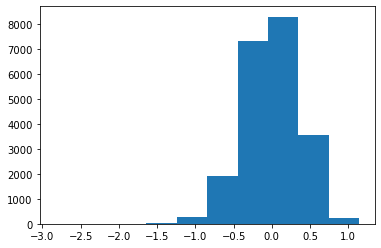

In [134]:
plt.hist(res['error'])
#the model is almost a normal distribution

(array([6.300e+01, 5.330e+02, 3.977e+03, 7.183e+03, 6.345e+03, 2.541e+03,
        7.330e+02, 1.930e+02, 3.800e+01, 7.000e+00]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839,
        13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214,
        15.85673089]),
 <BarContainer object of 10 artists>)

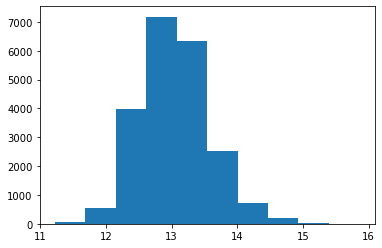

In [135]:
plt.hist(kc['log_price'])

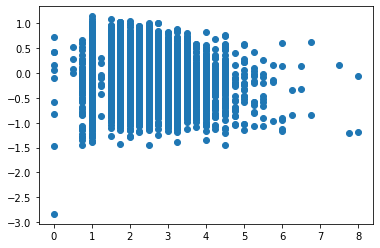

In [136]:
plt.scatter(kc['bathrooms'],res['error'])
# we can find that the points are around value 0, thus a good prediction.

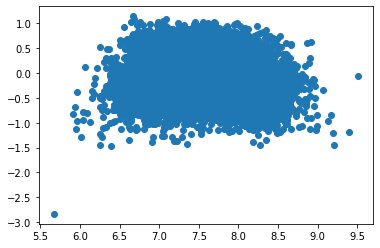

In [138]:
plt.scatter(kc['log_sqft_living'],res['error'])
# we can find that the points are around value 0, thus a good prediction.

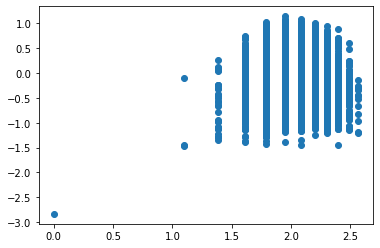

In [139]:
plt.scatter(kc['log_grade'],res['error'])
# we can find that the most of the points are around value 0, thus a good prediction.

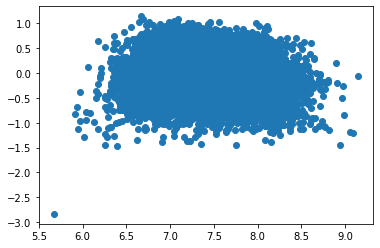

In [140]:
plt.scatter(kc['log_sqft_above'],res['error'])
# we can find that the most of the points are around value 0, thus a good prediction.

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-2.83657929, -1.4618069 , -1.45457667, ...,  1.07815482,
          1.09381507,  1.14297154])),
 (0.35570207836459755, 3.936964545245257e-15, 0.9980649810002026))

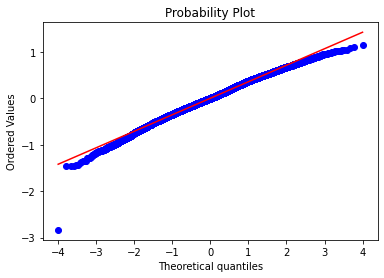

In [141]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)
#qq plot: the line indicates that the regression has a normal distribution.

In [143]:
infl = results_log.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bathrooms  dfb_log_sqft_living  dfb_log_grade  \
0          -0.000327       0.008062             0.003959      -0.004312   
1          -0.002054      -0.000728             0.002346      -0.004657   
2          -0.006172      -0.000920             0.004282       0.000170   
3           0.009375       0.011128             0.005303      -0.003634   
4           0.000152      -0.000173            -0.001273       0.001173   
...              ...            ...                  ...            ...   
21608      -0.004852      -0.004907             0.006034      -0.003203   
21609       0.001554      -0.000998             0.002419       0.001281   
21610       0.000912      -0.006005            -0.003194       0.004933   
21611      -0.002559      -0.002725             0.003415      -0.001676   
21612       0.000146      -0.000962            -0.000512       0.000791   

       dfb_log_sqft_above       cooks_d  standard_resid  hat_diag  \
0               -0.002836  4.2

In [144]:
infl.summary_frame()

,dfb_Intercept,dfb_bathrooms,dfb_log_sqft_living,dfb_log_grade,dfb_log_sqft_above,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000327,0.008062,0.003959,-0.004312,-0.002836,4.272095e-05,-1.114662,0.000172,-0.014615,-1.114668,-0.014615
1,-0.002054,-0.000728,0.002346,-0.004657,0.001743,7.536458e-06,0.431966,0.000202,0.006139,0.431958,0.006138
2,-0.006172,-0.000920,0.004282,0.000170,-0.000585,1.503295e-05,-0.537356,0.000260,-0.008670,-0.537348,-0.008670
3,0.009375,0.011128,0.005303,-0.003634,-0.011540,5.928351e-05,0.803314,0.000459,0.017217,0.803307,0.017217
4,0.000152,-0.000173,-0.001273,0.001173,0.000690,1.062532e-06,0.237309,0.000094,0.002305,0.237304,0.002305
...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.004852,-0.004907,0.006034,-0.003203,-0.001005,1.448601e-05,-0.633998,0.000180,-0.008511,-0.633989,-0.008510
21609,0.001554,-0.000998,0.002419,0.001281,-0.004595,1.152114e-05,-0.789648,0.000092,-0.007590,-0.789642,-0.007590
21610,0.000912,-0.006005,-0.003194,0.004933,0.000873,2.543576e-05,0.711456,0.000251,0.011277,0.711448,0.011277
21611,-0.002559,-0.002725,0.003415,-0.001676,-0.000792,4.671379e-06,-0.387329,0.000156,-0.004833,-0.387321,-0.004833


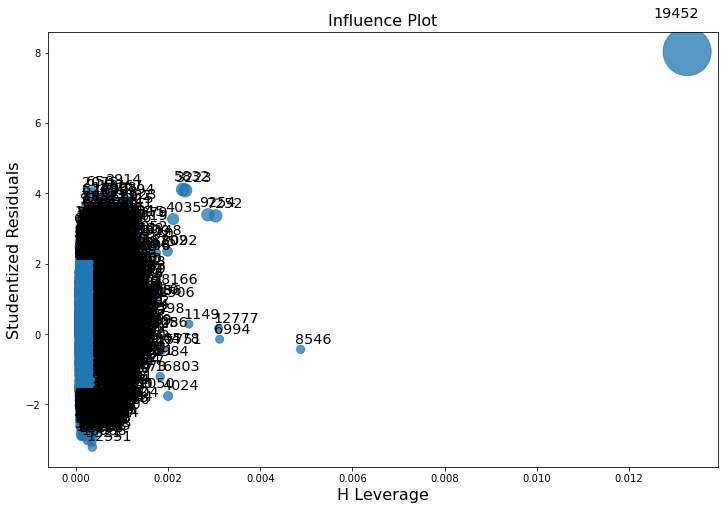

In [155]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_log, ax=ax, criterion='cooks')
# We can find that there is one influence spot located at the top right cornor, which indicates
# that we need to remove this outlier with index = 19452.

In [156]:
filtered_kc = kc.drop(19452, axis=0)

In [159]:
results_log_2 = ols("log_price ~ bathrooms + log_sqft_living + log_grade+ log_sqft_above", data=filtered_kc).fit()

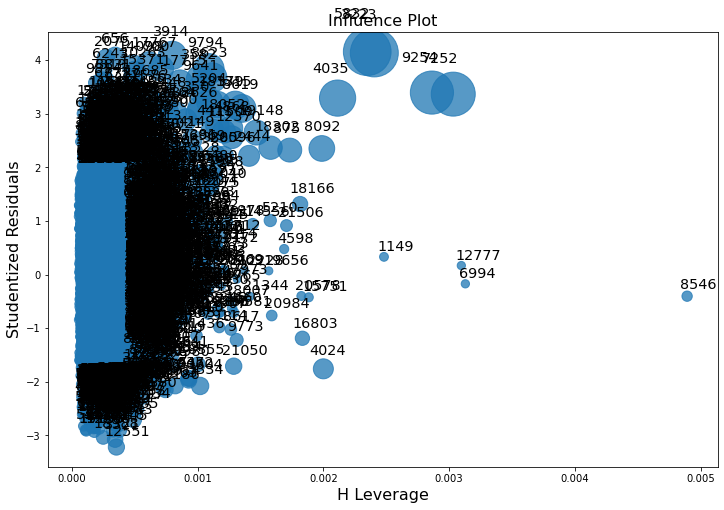

In [160]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_log_2, ax=ax, criterion='cooks')

In [162]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [166]:
filtered_kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,month,day,year,if_renovated,log_sqft_living,log_grade,log_price,log_sqft_above
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1340,5650,10,13,2014,0,7.073270,1.945910,12.309982,7.073270
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1690,7639,12,9,2014,1,7.851661,1.945910,13.195614,7.682482
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,2720,8062,2,25,2015,0,6.646391,1.791759,12.100712,6.646391
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1360,5000,12,9,2014,0,7.580700,1.945910,13.311329,6.956545
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1800,7503,2,18,2015,0,7.426549,2.079442,13.142166,7.426549


In [169]:
# separate features and target
categorical_features = ['waterfront','view', 'condition','if_renovated']
numerical_features = ['log_sqft_living','log_grade', 'log_sqft_above','bedrooms','bathrooms']
target = 'log_price'

In [170]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(filtered_kc[categorical_features + numerical_features]
                                                    ,filtered_kc[target],
                                                    test_size = 0.3, random_state=1234)

In [172]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [173]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [174]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [175]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition',
                                                   'if_renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade',
                                                   'log_sqft_above', 'bedrooms',
                                                   'bathrooms'])])),
           

In [178]:
pred2 = linear_regression.predict(X_test)

In [179]:
pred2

array([13.19512939, 13.16943359, 13.77416992, ..., 13.1774292 ,
       13.13970947, 12.93383789])

In [180]:
from sklearn.metrics import mean_squared_error

In [181]:
np.sqrt(mean_squared_error(pred2,y_test))

0.3346498351355013

In [182]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [183]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition',
                                                   'if_renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade',
                                                   'log_sqft_above', 'bedrooms',
                                                   'bathrooms'])])),
           

In [184]:
pred_ridge = ridge_regression.predict(X_test)

In [185]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

0.33459837630513434

In [186]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [187]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition',
                                                   'if_renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade',
                                                   'log_sqft_above', 'bedrooms',
                                                   'bathrooms'])])),
           

In [188]:
lasso_pred = lasso_regression.predict(X_test)

In [189]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

0.5254458012937951

In [190]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [191]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition',
                                                   'if_renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade',
                                                   'log_sqft_above', 'bedrooms',
                                                   'bathrooms'])])),
           

In [192]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [193]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

0.5254458012937951

We performed Ordinary Least Squares (OLS) regression, linear regression, LASSO, Ridge, and Elastic Net on the provided data. After evaluating the Mean Squared Error (MSE) values, we observed that both linear regression and ridge regression achieved the lowest MSE values, approximately 0.33. On the other hand, OLS regression had a slightly higher MSE of 0.35632826402534085. Meanwhile, Elastic Net and LASSO demonstrated the highest MSE values, around 0.52.

We can choose either linear regression model or ridge regression model to be the best model. They have the smallest mse, which indicates that the these two models provide the best overall fit to the data compared to the other models.




To choose the best model, we need to consider multiple reasons. We first consider alternative modeling approaches, in terms of minimizing prediction errors, we can conclude linear regression and ridge have the best performance. 

I believe ridge regression is the best, as ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. For our dataset, it's clear to see that we have similar variables, which would suffer from multicollinearity. 

To a business executive, Among these approaches, we believe that ridge regression is the most suitable choice for our dataset. Ridge regression is a model tuning method specifically designed to handle multicollinearity, which occurs when we have similar variables that are highly correlated. In our dataset, we have observed such multicollinearity, making ridge regression an ideal choice to address this issue effectively.

The main drivers of house price are bathrooms, sqft_living, grade, sqft_above, sqft_living15. They have an abosolute correlation value >= 0.5, which indicates there is a strong positive relationship between these variables and the house price. However, sqft_living15 has a strong multicolinearity, so we remove this variable from our prediction list. 

Before we apply log method into our ols:

Bathrooms: For each additional bathroom, we can expect the price to decrease by approximately $37,060 (negative coefficient).

Sqft_living: For each additional square foot of living area, we can expect the price to increase by approximately $252.53.

Grade: An increase in the grade by one unit corresponds to an increase in the price by approximately $115,100.

Sqft_above: For each additional square foot of area above ground level, we can expect the price to decrease by approximately $76.88 (negative coefficient).

The intercept (-$650,200) represents the estimated price when all the x variables are zero.

After applying logarithmic transformation to the variables in the OLS regression to address the issue, the distribution of the data becomes closer to normal, and the coefficients become extremely small. A more accurate and reliable interpretation of the relationships between the predictors and the target variable is provided.
